In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
data = df.drop("koi_disposition", axis=1)

In [6]:
target = df["koi_disposition"]

In [7]:
feature_names = data.columns
data.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42) 

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9016018306636155

In [11]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.10643350173454123, 'koi_fpflag_co'),
 (0.09831070413736474, 'koi_fpflag_nt'),
 (0.06875518346900894, 'koi_fpflag_ss'),
 (0.05387326734220124, 'koi_model_snr'),
 (0.04345022234576622, 'koi_prad'),
 (0.036563529776582004, 'koi_duration_err2'),
 (0.035349435788572206, 'koi_steff_err1'),
 (0.03483298590633587, 'koi_duration_err1'),
 (0.03429397300157267, 'koi_fpflag_ec'),
 (0.030875411184268307, 'koi_prad_err1'),
 (0.030507226875597582, 'koi_prad_err2'),
 (0.029980475696793827, 'koi_steff_err2'),
 (0.02361646283216084, 'koi_period'),
 (0.02326318791276424, 'koi_time0bk_err1'),
 (0.022051113809712097, 'koi_depth'),
 (0.02070412012360937, 'koi_time0bk_err2'),
 (0.020658170655258826, 'koi_duration'),
 (0.0187662460545214, 'koi_period_err1'),
 (0.018194256886853173, 'koi_impact'),
 (0.017619735803929337, 'koi_period_err2'),
 (0.017384975289919478, 'koi_insol_err1'),
 (0.01655992055403316, 'koi_insol'),
 (0.015403787839423633, 'koi_depth_err1'),
 (0.014855640057339421, 'koi_teq'),
 (0.01355

# Select your features (columns)

In [12]:
# Set features. This will also be used as your x values.
X = df[['koi_fpflag_co', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_model_snr', 'koi_prad', 'koi_depth', 'koi_duration', 'koi_impact']]
y=df["koi_disposition"]


# Create a Train Test Split

Use `koi_disposition` for the y values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [14]:
X_train.head()

,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_model_snr,koi_prad,koi_depth,koi_duration,koi_impact
6122,0,0,0,10.8,1.24,123.1,3.61600,0.150
6370,0,0,1,13.8,0.86,114.6,2.30900,0.291
2879,0,1,0,254.3,3.21,641.1,79.89690,0.970
107,0,0,0,38.4,2.25,875.4,2.63120,0.300
29,0,0,0,696.5,12.21,9802.0,2.22739,0.831


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [15]:
# Scale your data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)


In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.802
k: 3, Train/Test Score: 0.899/0.837
k: 5, Train/Test Score: 0.879/0.834
k: 7, Train/Test Score: 0.871/0.838
k: 9, Train/Test Score: 0.862/0.836
k: 11, Train/Test Score: 0.860/0.834
k: 13, Train/Test Score: 0.856/0.830
k: 15, Train/Test Score: 0.853/0.826
k: 17, Train/Test Score: 0.849/0.821
k: 19, Train/Test Score: 0.849/0.820
k: 21, Train/Test Score: 0.846/0.820
k: 23, Train/Test Score: 0.841/0.817
k: 25, Train/Test Score: 0.843/0.819
k: 27, Train/Test Score: 0.843/0.819
k: 29, Train/Test Score: 0.838/0.815


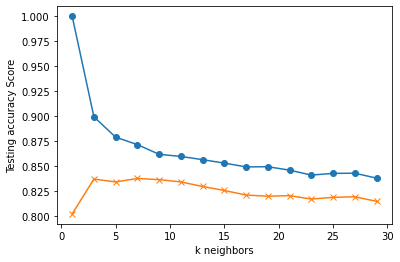

In [17]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()
    

# Train the Model



In [18]:
model1 = KNeighborsClassifier(n_neighbors=17)
model1.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=17)

In [20]:
print(f"Training Data Score: {model1.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model1.score(X_test_scaled, y_test)}")

Training Data Score: 0.8491321762349799
Testing Data Score: 0.8209382151029748


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)